## Exploratory Data Visualization
- Use data visualization to understand U.S. unemployment data
- The United States Bureau of Labor Statistics (BLS) surveys and calculates the monthly unemployment rate
- Range from 1948 to 2017

In [1]:
import pandas as pd
unrate = pd.read_csv('UNRATE.csv')
unrate.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


- When we read the dataset into a DataFrame, pandas will set the data type of the DATE column as a text column. Because of how pandas reads in strings internally, this column is given a data type of object. 
- We need to convert this column to the datetime type using the pandas.to_datetime() function, which returns a Series object with the datetime data type that we can assign back to the DataFrame:

In [2]:
unrate['DATE'] = pd.to_datetime(unrate['DATE']) # to_datetime()
unrate.head(3)

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0


### Matplotlib general workflow:
- create a plot using data
- customize the appearance of the plot
- display the plot
- edit and repeat until satisfied

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Line Charts

In [4]:
# Seasonality and enployment rate

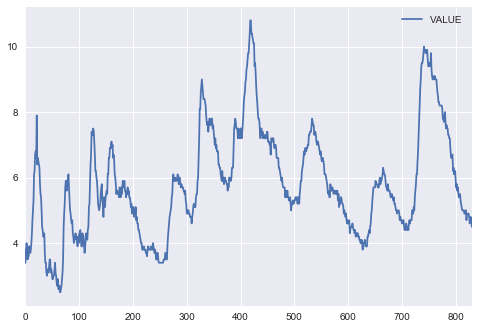

In [4]:
unrate.plot()
plt.show()  # display it -- call the show()

In [5]:
# OR Jupyter magic code
%matplotlib inline

In [7]:
# set the x/y : plt.plot(x_values, y_values)

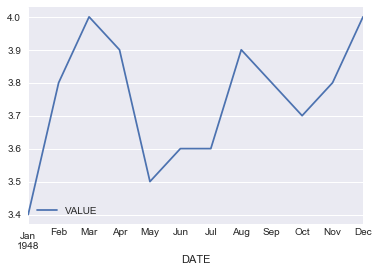

In [6]:
unrate[0:12].plot('DATE', 'VALUE') # enployment rate in 1948

In [9]:
# Fixing Axis Ticks: tick labels are too close or rotation and are unreadable
# If need, xticks() / yticks() function customize the behavior of the axis ticks
# check the documents, e.g. plt.xticks(rotation=90)

In [10]:
# Adding Axis Labels And A Title
# Always adding axis labels and a title to your plot is a good habit to have

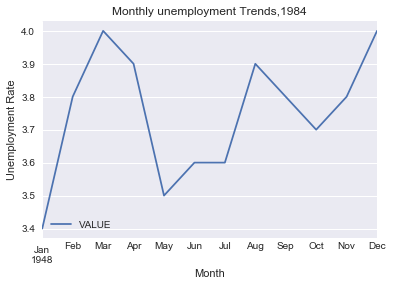

In [7]:
unrate[0:12].plot('DATE','VALUE')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title('Monthly unemployment Trends,1984')

### 2. Multiple Plots

In [12]:
# figure() -- a container for all plots was created

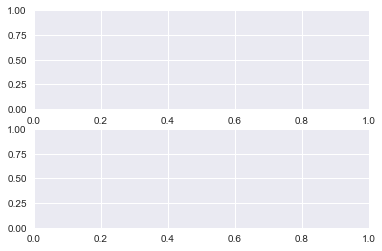

In [8]:
# create empty two plots
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)  # add a new subplot to an existing figure without data
ax2 = fig.add_subplot(2,1,2)
plt.show()

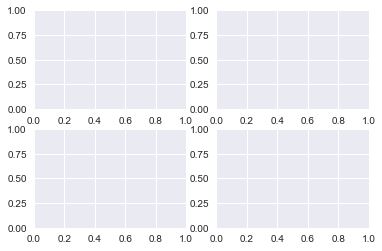

In [9]:
# create  the four cubes/ no data
fig = plt.figure()  
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
plt.show()

In [15]:
# Adding data: Each time we want to generate a line chart, we need to call Axes.plot() 
# and pass in the data we want to use in that plot

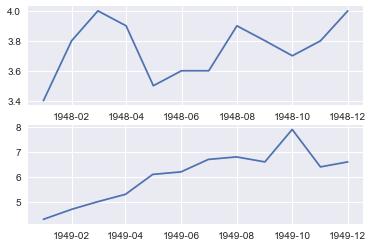

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)   # plot 1
ax2 = fig.add_subplot(2,1,2)   # plot 2

ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])    # Year:1948
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])  # Year:1949

plt.show()


In [17]:
# Formatting And Spacing

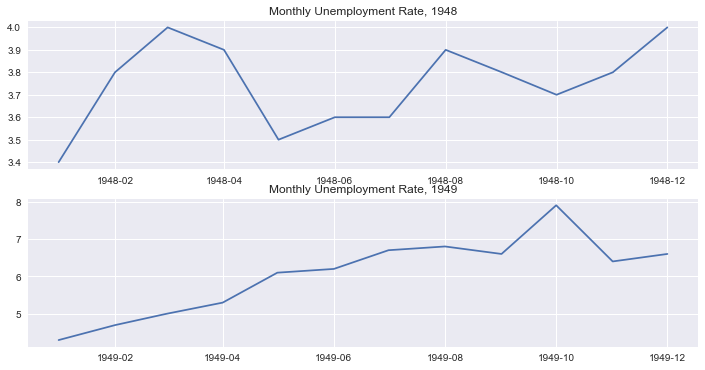

In [11]:
fig = plt.figure(figsize=(12,6))  # width:12 inches / height:6 inches
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax2.set_title('Monthly Unemployment Rate, 1949')
plt.show()

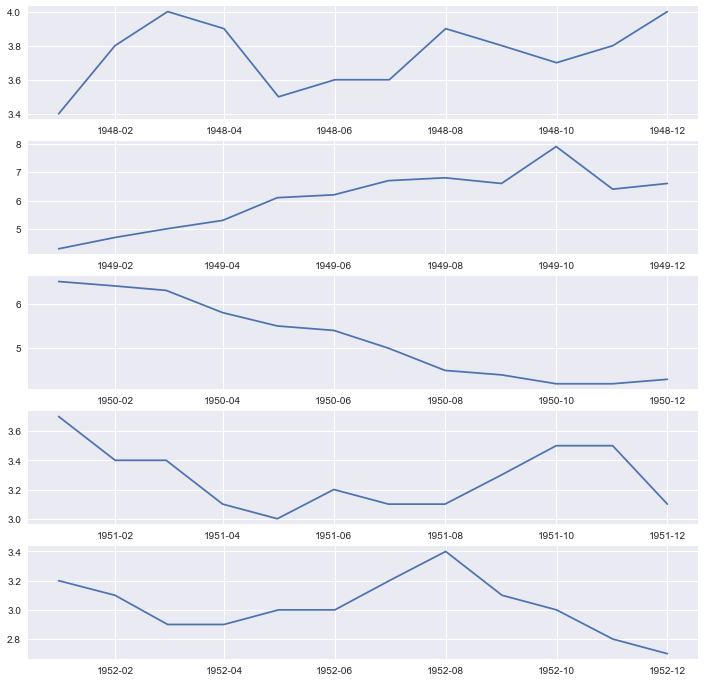

In [12]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)
ax4 = fig.add_subplot(5,1,4)
ax5 = fig.add_subplot(5,1,5)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax3.plot(unrate[24:36]['DATE'], unrate[24:36]['VALUE'])
ax4.plot(unrate[36:48]['DATE'], unrate[36:48]['VALUE'])
ax5.plot(unrate[48:60]['DATE'], unrate[48:60]['VALUE'])
plt.show()

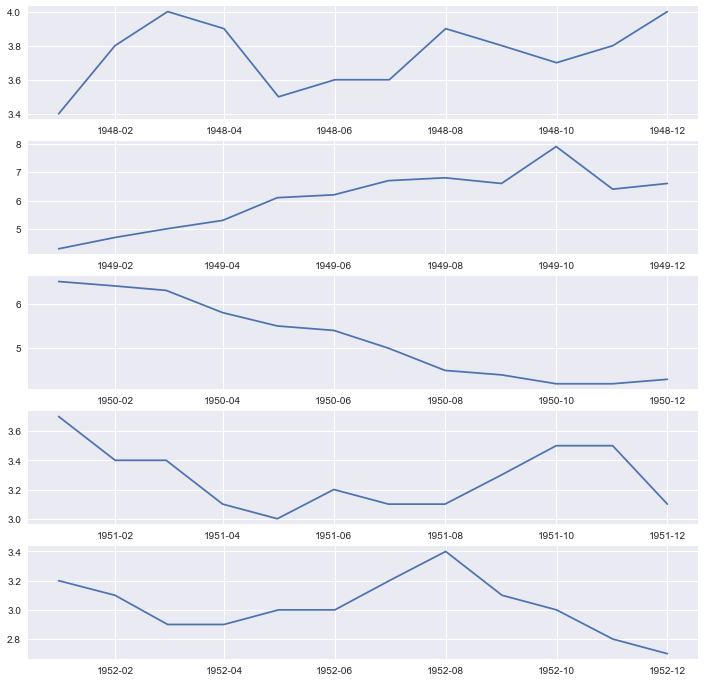

In [13]:
# any repition could use loop or def() to deal with cleverly
fig = plt.figure(figsize=(12,12))

for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset['DATE'], subset['VALUE'])

plt.show()

In [23]:
# pd.Series.dt : extract the month values from the DATE column to a new column
# c='' set the colors

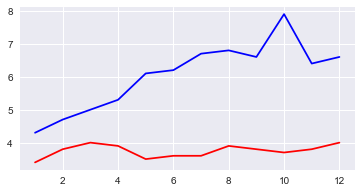

In [14]:
unrate['MONTH'] = unrate['DATE'].dt.month
fig = plt.figure(figsize=(6,3))

plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue')

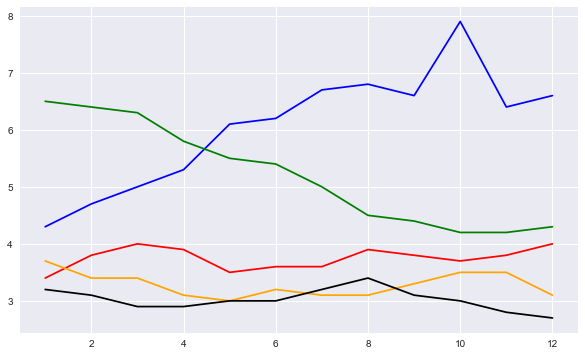

In [15]:
# Multiple lines with multiple colors 
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i])
    
plt.show()

In [27]:
# Adding A Legend -- plt.legend(loc='upper left')

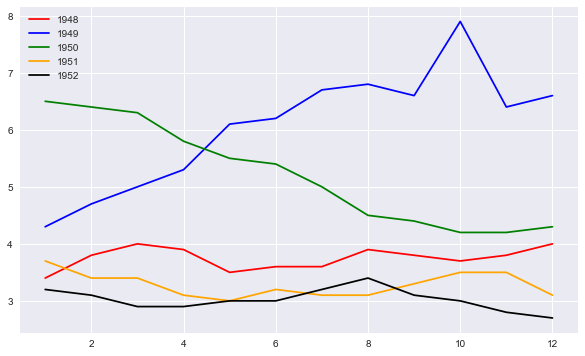

In [16]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
plt.legend(loc='upper left')
plt.show()

In [29]:
# Final Tweaks

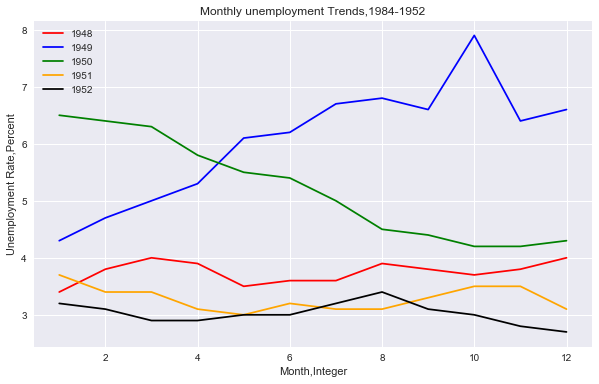

In [17]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
plt.legend(loc='upper left')
plt.xlabel('Month,Integer')
plt.ylabel('Unemployment Rate,Percent')
plt.title('Monthly unemployment Trends,1984-1952')
plt.show()

### 3. Bar Plots And Scatter Plots
- In line charts, markers and lines correspond directly with x-axis and y-axis coordinates, all matplotlib needed was the data we wanted plotted. 
- To create a useful bar plot, however, we need to specify the positions of the bars, the widths of the bars, and the positions of the axis labels. 

In [33]:
# Line charts are good at the rows had a natural ordering to it

In [28]:
# Bar Plots

In [18]:
import pandas as pd
reviews = pd.read_csv('fandango_scores.csv')
norm_reviews = reviews[['FILM','RT_user_norm','Metacritic_user_nom','IMDB_norm','Fandango_Ratingvalue','Fandango_Stars']]
norm_reviews.head(1)

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.9,4.5,5.0


- These sites use different scales for ratings. Some use a 5 star scale while others use a 100 point scale. In addition, Metacritic and Rotten Tomatoes aggregate scores from both users and film critics while IMDB and Fandango aggregate only from their users. We'll focus on just the average scores from users, because not all of the sites have scores from critics.

- The RT_user_norm, Metacritic_user_nom, IMDB_norm, and Fandango_Ratingvalue columns contain the average user rating for each movie, normalized to a 0 to 5 point scale. This allows us to compare how the users on each site rated a movie. While using averages isn't perfect because films with a few reviews can skew the average rating, FiveThirtyEight only selected movies with a non-trivial number of ratings to ensure films with only a handful of reviews aren't included.

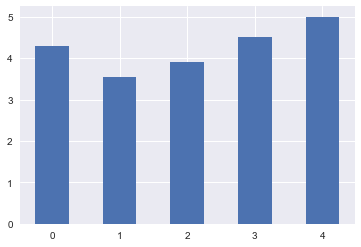

In [19]:
import matplotlib.pyplot as plt
from numpy import arange
# Positions of the left sides of the bars
bar_positions = arange(5)
# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews.ix[0, num_cols].values

fig, ax = plt.subplots() # returned Figure object to fig and the returned Axes object to ax
ax.bar(bar_positions, bar_heights, 0.5) # left set to 'bar_positions', right set to 'bar_heights'
plt.show()                              # width set to 0.5 == bin_size


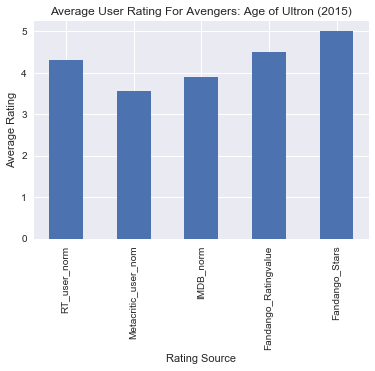

In [23]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews.ix[0, num_cols].values
bar_positions = arange(5) + 1
tick_positions = range(1,6)
fig, ax = plt.subplots()

#  Aligning Axis Ticks And Labels
ax.bar(bar_positions, bar_heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=90)

ax.set_xlabel('Rating Source')
ax.set_ylabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

In [24]:
# Horizontal Bar Plot

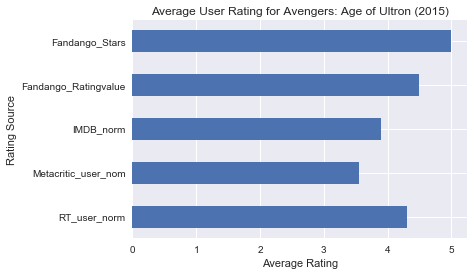

In [27]:
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_widths = norm_reviews.ix[0, num_cols].values
bar_positions = arange(5) + 1
tick_positions = range(1,6)
fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5) 
# barh() -- 2 required parameters, bottom and width. 

ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel('Rating Source')
ax.set_xlabel('Average Rating')
ax.set_title('Average User Rating for Avengers: Age of Ultron (2015)')
plt.show()

In [29]:
# Scatter Plot

In [30]:
# From bar chart, it's clear that Fandango users are higher than those from the other sites
# Scatter Plot can help to visualize many points, detailly 

In [31]:
# A scatter plot helps us determine if 2 columns are weakly or strongly correlated
# scatter() method has 2 required parameters, x and y

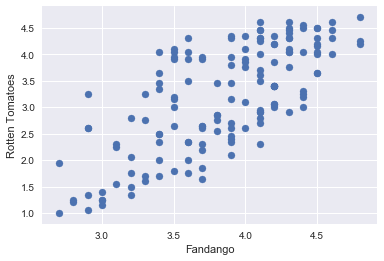

In [32]:
# Create a single subplot and returned Figure object to fig
# and returned Axes object to ax
fig, ax = plt.subplots()
ax.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax.set_xlabel('Fandango')
ax.set_ylabel('Rotten Tomatoes')
plt.show()

- The scatter plot suggests that there's a weak, positive correlation between the user ratings on Fandango and the user ratings on Rotten Tomatoes. The correlation is weak because for many x values, there are multiple corresponding y values.

In [ ]:
# See what happens when we flip the columns

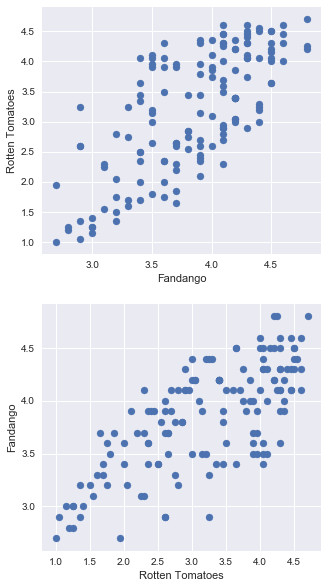

In [33]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax2.scatter(norm_reviews['RT_user_norm'], norm_reviews['Fandango_Ratingvalue'])
ax2.set_xlabel('Rotten Tomatoes')
ax2.set_ylabel('Fandango')
plt.show()

- The second scatter plot is a mirror reflection of the first second scatter plot.

In [34]:
# see how Fandango ratings correlate with all 3 of the other review sites

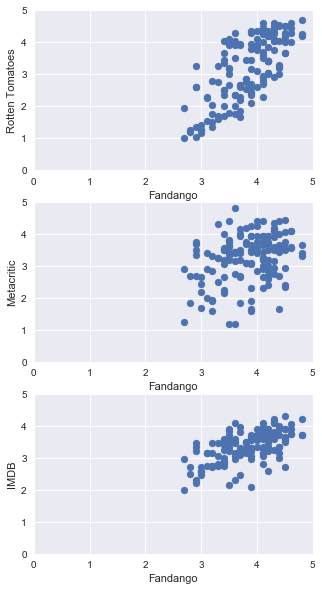

In [38]:

fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
# scatter plots for comparison, all plots share the same ranges in the x-axis and y-axis
ax1.set_xlim(0, 5)    # set the standard (0,5)
ax1.set_ylim(0, 5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic')
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['IMDB_norm'])
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB')
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

plt.show()

- From the scatter plots, we can conclude that user ratings from IMDB and Fandango are the most similar. In addition, user ratings from Metacritic and Rotten Tomatoes have positive but weak correlations with user ratings from Fandango. 
- We can also notice that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. 
- User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.
- The scatter plots unfortunately only give us a cursory understanding of the distributions of user ratings from each review site

### 4. Histograms And Box Plots

In [39]:
# frequency distribution

In [45]:
fandango_distribution = norm_reviews['Fandango_Ratingvalue'].value_counts()
fandango_distribution = fandango_distribution.sort_index()
# .value_counts() to count
# .sort_index() to sort
imdb_distribution = norm_reviews['IMDB_norm'].value_counts()
imdb_distribution = imdb_distribution.sort_index()

print(fandango_distribution)
print(imdb_distribution)

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64
2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64


In [47]:
# Binning:  dividing the range of  values into fixed length intervals, called bins
# easier to compare because of the shared x-axis (the bins)
# histogram.: plot the bins along with the frequency sums as a bar plot .hist()

In [50]:
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))

(array([  0.,   0.,   0.,   0.,   0.,   9.,  25.,  43.,  53.,  16.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

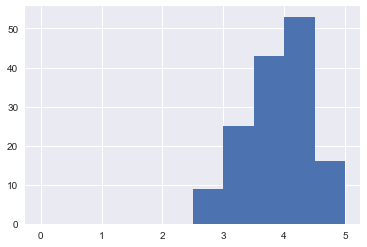

In [51]:
fig,ax = plt.subplots() # set the fig as ax
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0,5))
plt.show()

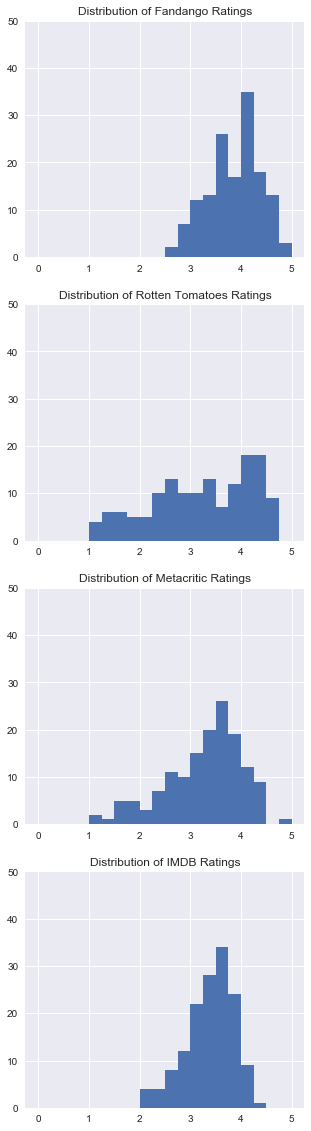

In [55]:
# Comparing 
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)
ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))
# The length of each bin will be 0.25 (5 / 20) instead of 0.5 (5 / 10)
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0, 50)

ax2.hist(norm_reviews['RT_user_norm'], 20, range=(0, 5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0, 50)

ax3.hist(norm_reviews['Metacritic_user_nom'], 20, range=(0, 5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0, 50)

ax4.hist(norm_reviews['IMDB_norm'], 20, range=(0, 5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0, 50)

plt.show()

### Quartiles
- Around 50% of user ratings from Fandango fall in the 2 to 4 score range
- Around 50% of user ratings from Rotten Tomatoes fall in the 2 to 4 score range
- Around 75% of the user ratings from Metacritic fall in the 2 to 4 score range
- Around 90% of the user ratings from IMDB fall in the 2 to 4 score range
### To visualize quartiles, need to use a box plot

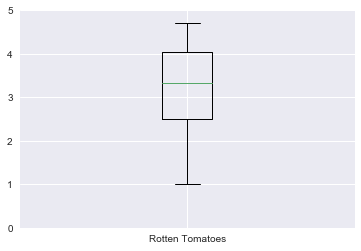

In [57]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
# Generate a box plot from the values in the RT_user_norm column
ax.set_xticklabels(['Rotten Tomatoes'])
ax.set_ylim(0,5) # y-axis limit to range from 0 to 5
plt.show()

- the bottom 25% of user ratings range from around 1 to 2.5
- the top 25% of of user ratings range from around 4 to 4.6

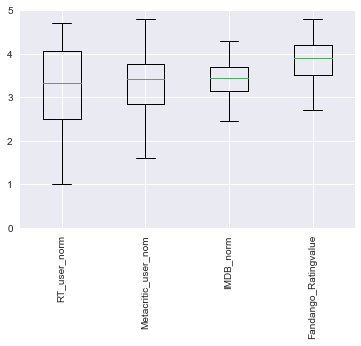

In [58]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
fig,ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_ylim(0,5)
plt.show()

- user ratings from Rotten Tomatoes and Metacritic span a larger range of values
- user ratings from IMDB and Fandango are both skewed in the positive direction and span a more constrained range of values